# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 13
### <center> Yoshihiro Shirai

# Introduction to Neural Networks

- These lecture notes are partially based on "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, by Aurelien Geron (O'Reilly), 2022."

- Chapter 10: perceptron, multi-layer perceptron, backpropagation

#  0. Overview of the lecture

- Today, we discuss the simplest of artificial neural networks (ANN), namely, the **perceptron** and **multi-layer perceptron**

- We also explain how these ANNs are trained.

# 1. Introduction to artificial neural networks (ANN)

- ANNs are powerful and scalable computational frameworks that were inspired by biological neurons in the brain.

- They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks.

- Applications include classifying images, speech recongnition, recommending videos, learning to play games (AlphaGo).

- The "best" ANNs, however, do not necessarily have a biological justification. Chapter 10 of the textbook gives some biological insights on BNNs.

- The invention of ANNs is usually attributed to neurophysiologist Warren McCulloch and mathematician Walter Pitts who proposed a simple model for biological neurons in 1940s. The model became known as an **artificial neuron**.

- Their artificial neuron had one or more boolean (i.e. 0 or 1) inputs and one boolean output. The neuron activates its output whenever a certain number of its inputs are activated.

- McCulloch and Pitts showed that this very simple model is capable of performing many logical operations. An example is given below where a neuron is activated when at least 2 of its inputs are active. In the 4th example, the neuron for B is an inhibitor when activated.

- One can then use these neurons as building blocks of more complex networks for performing complex logical operations.

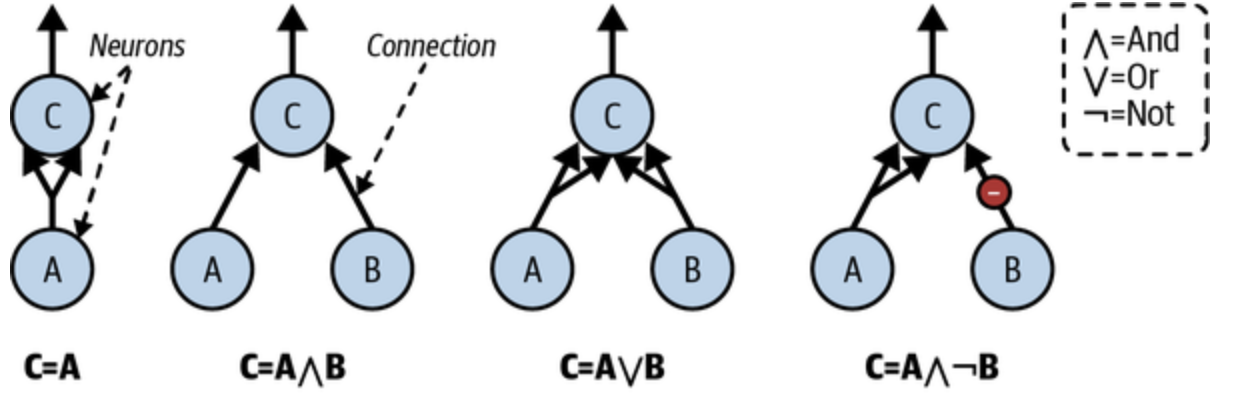

In [1]:
from IPython.display import Image
Image("Figs/LogicalNeuron.png",width=600)

# 2. Perceptron

- Perceptron is a ANN invented in 1957 (by Frank Rosenblatt).

- The building blocks (usually called neurons, cells, or units) are different from the logical artificial neurons. They are called linear threshold units (LTU) and are as follows.

- The inputs and outputs are now continuous variables (instead of boolean).

- Each input $x_i$ has a weight $w_i$. The output of the neuron is
$$\begin{align*}
    h_{\mathbf{w}}(\mathbf{x}) = \text{step}(\mathbf{w}\cdot \mathbf{x}+b)
\end{align*}$$

- $b$ is a bias (intercept) term

- Here, step $(t)$ is a step function. Common choice are the **Heqviside step function** or the **sign function**
$$\begin{align*}
\text{Heaviside}(t)=\begin{cases}1;& \quad t\ge 0\\ 0; & \quad t< 0\end{cases}\quad\quad \text{sign}(t)=\begin{cases}1;& \quad t\leq ; 0\\ 0;&\quad t=0\\ -1;&\quad t\geq;0\end{cases}
\end{align*}

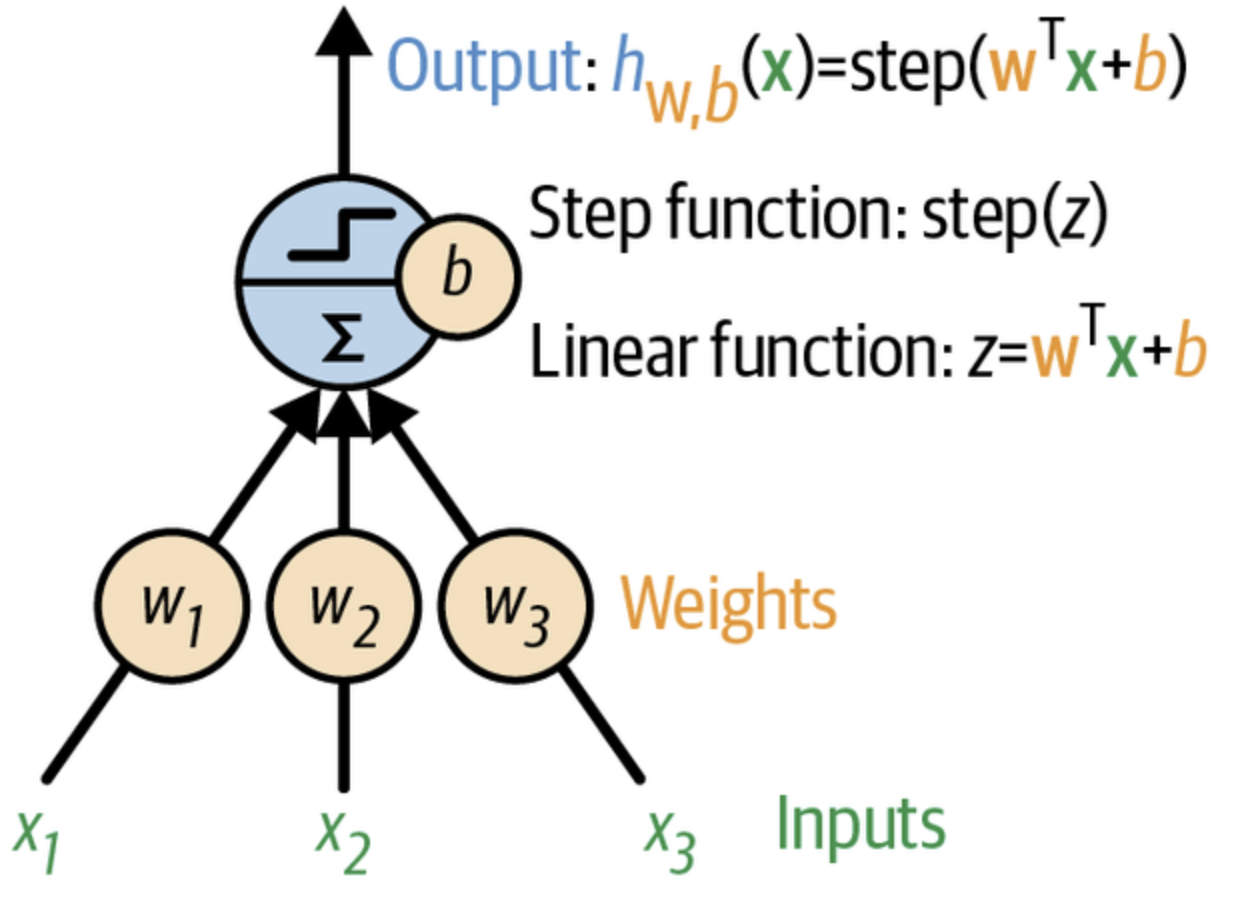

In [2]:
Image("Figs/LTU.png",width=600)

- We can use one LTU to perform a linear binary classification task: given a set of features $\mathbf{x}$, identify the class $h_\mathbf{w}(\mathbf{x})$ (0 or 1 if using Heaviside function).

- Of course, we need to train the LTU by choosing the "correct" values of its weights $\mathbf{w}$ (more on this shortly).

- A perceptron is a single layer of LTUs, where each neuron is connected to all the inputs.

- It is customary to represent the inputs through **input neurons**, which are passthrough neurons that directly output their input. Bias term is usually represented by a special type of neuron that outputs 1 at all times.

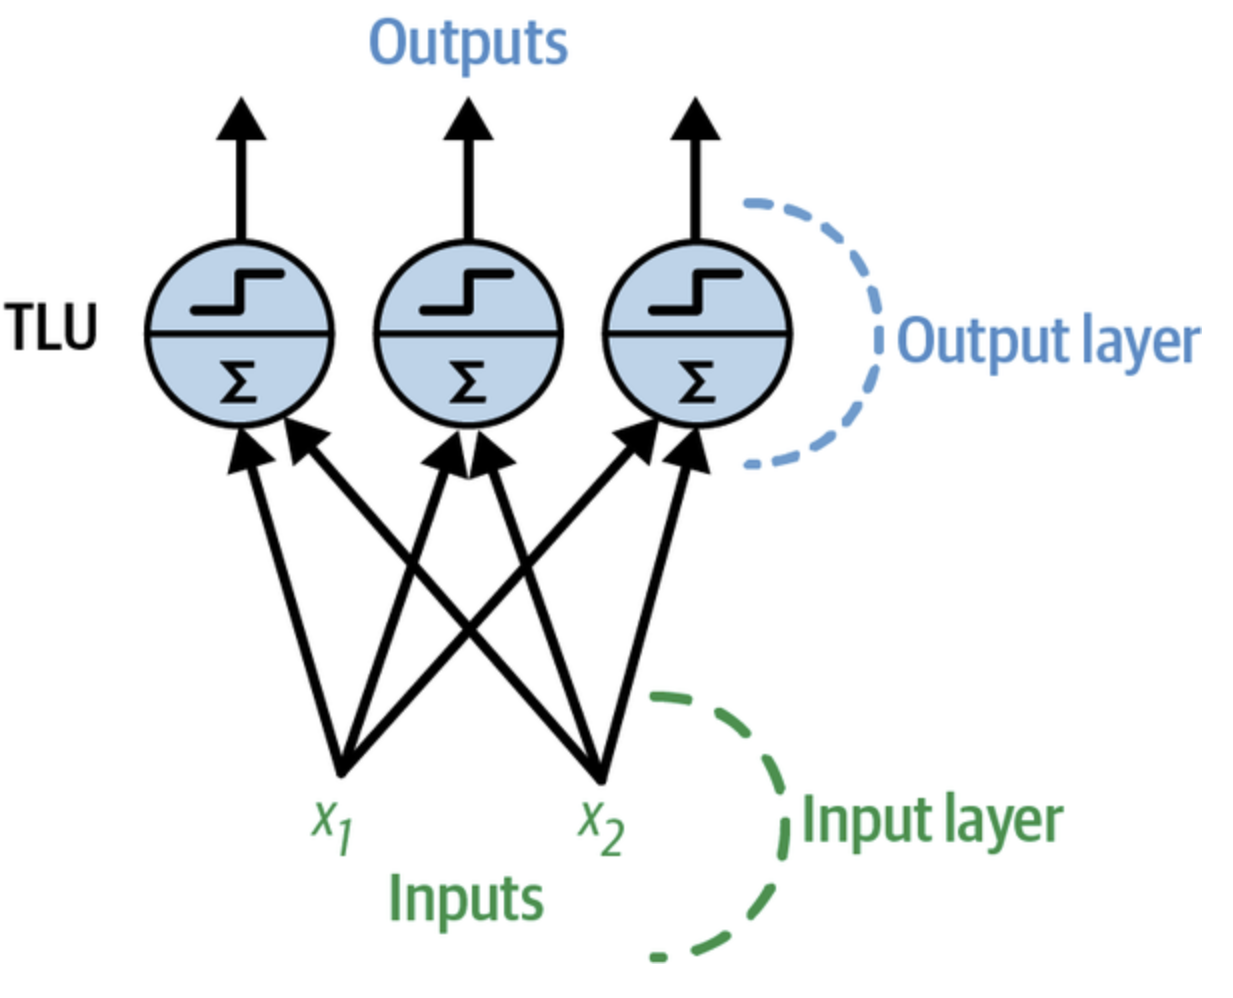

In [3]:
Image("Figs/perceptron.png", width=600)

- How can we train a perceptron?

- We first need a labeled training set for this multi-label classification task. Each observations should have as many features as the input cells, and the same number of targets as the output cells (i.e. LTUs).

- We have $K$ inputs and $M$ outputs. Let us assume that the training set is
$$\begin{align*}
S = \Big\{(\mathbf{x}_n,\mathbf{y}_n) = (x_{n,1},\dots x_{n,K}, y_{n,1}, \dots, y_{n,M})\Big\}_{n=1}^N
\end{align*}$$

- The perceptron is trained by the <strong>Hebb rule</strong>:
    - start with an initial value for the weights $w^{(0)}_{i,j}$ (the weight of connection between input $i$ and output $j$)
    - Iterate the following loop. In iteration $k$
    - Take an observation $\mathbf{x}_n,\mathbf{y}_n$ from $S$ and let $\hat{\mathbf{y}}^{(k)}$ be the predicted output given the current weights $w_{i,j}^{(k)}$ and input $\mathbf{x}_n$
    - Update the weight as follows: $w_{i,j}^{(k+1)} = w_{i,j}^{(k)} + \eta (y_{n,j} - \hat{y}_j^{(k)})x_{n,i}$.
    - Here, $\eta\geq 0$ is the learning rate hyperparameter. It has the same effect as in the learning hyperparameter of the gradient descent method.

- The updating rule works by leaving the connections that predicted correctly, and tweaking the weights of the ones that predicted incorrectly. This updating formula was motivated by the observation that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger.

- There is, however, a more direct explanation of the Hebb rule: it is the stochastic gradient decent algorithm.

- For simplicity, we only consider the case when there is 1 output cell (i.e. only 1 LTU). There can be many input cells.

- Our argument is based on logistic regression. Recall logistic regression:
$$\begin{align*}
    &Y_n = \sigma_\beta\left(\mathbf{w} \cdot \mathbf{X}_n\right) + \varepsilon_n,\\
    &\sigma_\beta(t) = \frac{1}{1+e^{-\beta\,t}}. 
\end{align*}$$

- For a reason that becomes clear shortly, we have parametrized the logistic function with a constant $\beta$

- Recall that we train logistic regression by minimizing the log-loss function
$$\begin{align*}
    J_\beta(\mathbf{w}) = -\frac{1}{N} \sum_{n=1}^N \left[Y_n \log \sigma_\beta(\mathbf{w}\cdot \mathbf{X}_n) + (1-Y_n)\log\big(1 - \sigma_\beta(\mathbf{w}\cdot \mathbf{X}_n)\big)\right]
\end{align*}$$

- We have (check this):
$$\begin{align*}
    \frac{\partial}{\partial w_i} J_\beta(\mathbf{w}) = -\frac{\beta}{N} \sum_{n=1}^N \left[Y_n - \sigma_\beta(\mathbf{w}\cdot \mathbf{X}_n)\right] X_{n,i}
\end{align*}$$

- Thus, the stochastic gradient descent iteration with learning rate $\alpha$ is
$$\begin{align*}\tag{$\star$}
    w_i^{(k+1)} = w_i^{(k)} + \alpha \beta \left[Y_n - \sigma_\beta(\mathbf{w}\cdot \mathbf{X}_n)\right] X_{n,i}
\end{align*}$$

- Now, letting $\beta\rightarrow \infty$, we recover the step function. That is, for all $x\in\mathbb{R}$
$$\begin{align*}
    \lim_{\beta\rightarrow +\infty} \sigma_{\beta}(x) = \text{Heaviside}(x).
\end{align*}$$


In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

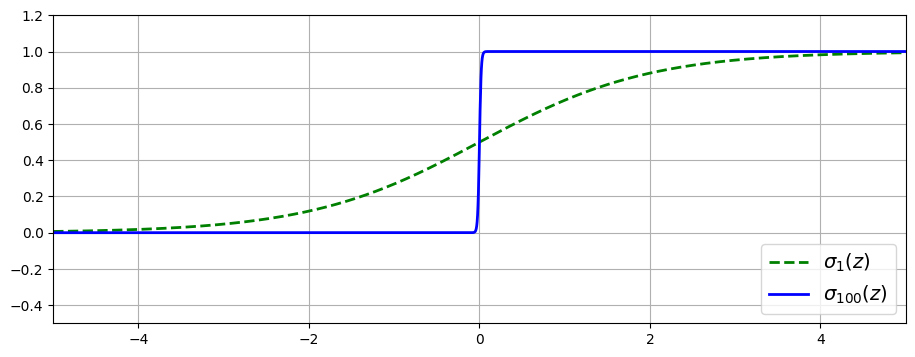

In [5]:
def sigmoid(z, beta=1):
    return 1 / (1 + np.exp(-z*beta))

z = np.linspace(-5, 5, 2000)
plt.figure(figsize=(11,4))
plt.plot(z, sigmoid(z,1.0), "g--", linewidth=2, label=r"$\sigma_{1}(z)$")
plt.plot(z, sigmoid(z,100), "b-", linewidth=2, label=r"$\sigma_{100}(z)$")
plt.grid(True)
plt.axis([-5, 5, -.5, 1.2])
plt.legend(loc="lower right", fontsize=14)
plt.show()

- Now, let $\eta=\alpha\beta$ be a constant and let $\beta$ be a very large number (so that $\alpha$ is almost zero). Then, a perceptron with many input and one output cell can be seen as the limit of a logistic regression.

- Furthermore, the stochastic gradient decent iteration becomes Hebb's rule:
$$\begin{align*}
    w_i^{(k+1)} = w_i^{(k)} + \eta (y_{n} - \hat{y}_j^{(k)})x_{n,i}
\end{align*}$$

- This argument can be extended to the case where there are multiple outputs (i.e. multiple LTUs).

- As you can see, a single LTU corresponds to logistic regression.

- We can use `Scikit-Learn` to train a perceptron with a single LTU. Simply use the class `sklearn.linear_model.Perceptron`. We can also use `SGDClassifier(loss=”perceptron”, eta=0.1, learning_rate=”constant”, penalty=None)`.

- Let us see this in the iris data set. The code below does 100 epochs of the stochastic gradient descent.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

In [7]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [8]:
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1] #coefficients of the line separating the regions
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

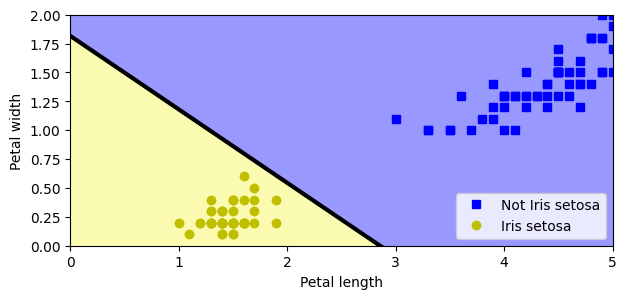

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

# 3. Multi-layer perceptron

- Perceptrons are limited models. Specifically, they are linear classifiers. As such, they are incapable of classifying non-linear datasets, such as XOR (exclusive or).

- Most of these deficiencies can be remedied by adding more LTU **layers** (that is, LTUs that output to another LTU). The following multi-layer perceptron solves the XOR problem The weights are shown in the diagram below and the step function is the Heaviside function.

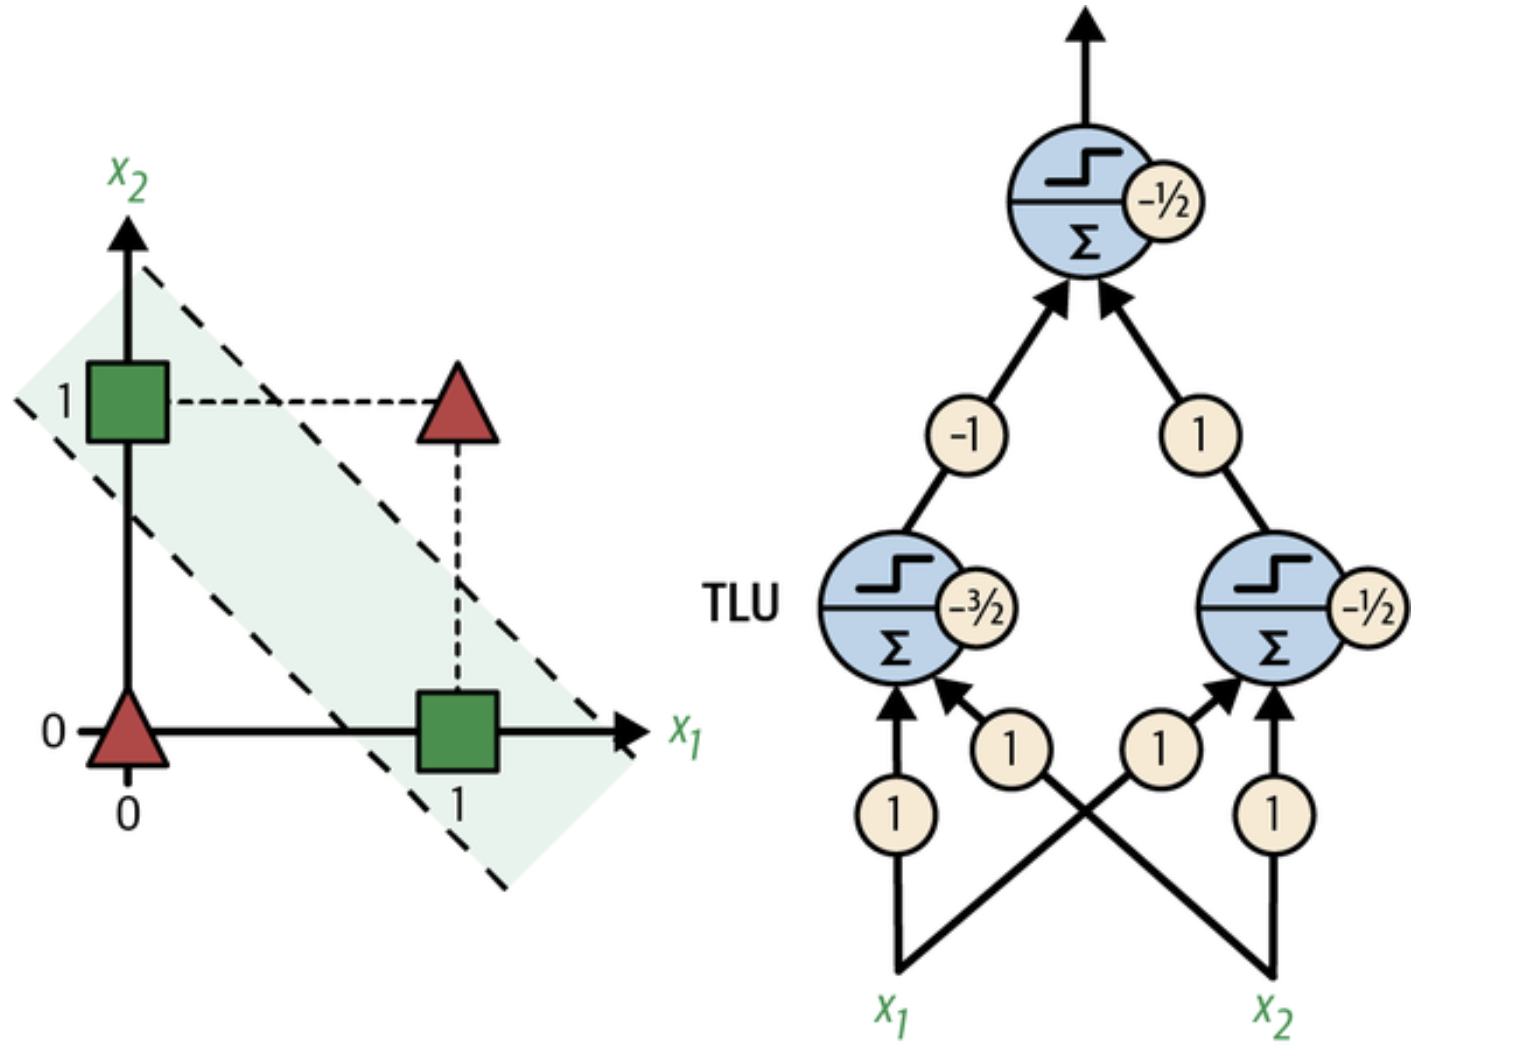

In [10]:
Image("Figs/XOR.png",width=700)

- A network of LTUs with 2 or more LTU layers is called a **multi-layer perceptron (MLP)**. Inner layers of LTUs are called **hidden layers**.

- So, an MLP has an input layer (consisting of passthrough cells), an output layer, and one or more hidden layers.

- All layers are fully connected to the next layer.

- In general, an ANN with two or more **hidden layers** is called a deep neural network (DNN). A network with only one hidden layer is called a shallow ANN.

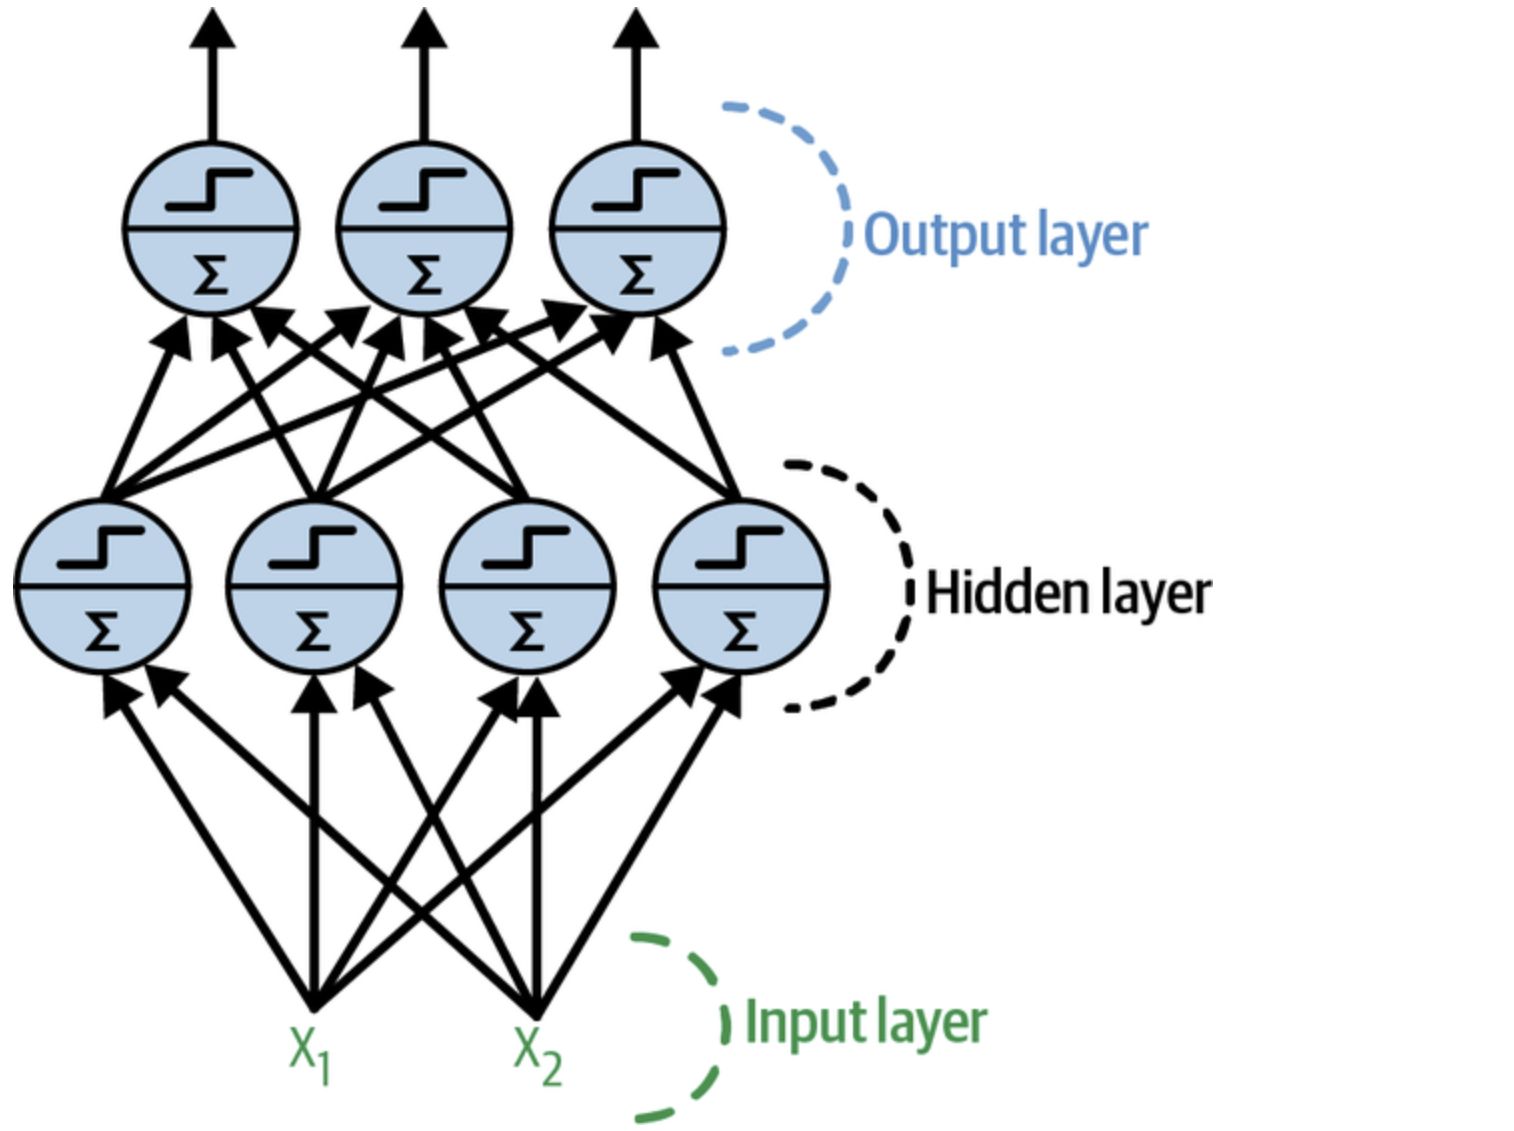

In [11]:
Image("Figs/MLP.png",width=600)

## 3.1 Backpropogation and activation functions

- After the invention of neural networks in 1940s and 1950s, the interest in them faded away for 2 decades. The main reason was that single layer perceptrons are very limited (being essentially linear classifiers), while researchers were struggling with efficiently training MLPs.

- Interest in neural networks grew again with the invention of the **backpropagation** algorithm in the 1980s. This is a algorithim to train MLPs.

- Generally speaking, the algorithm works like this.
    - Define a loss function. For example, MSE for regression, and cross entropy for classification (log-loss for binary classification).
    - Calculate the gradient with respect to the weights.
    - But to do this, we need to calculate the output first because the loss function depends on it. This is called the **forward pass**.
    - Then we can calculate the gradients. This is called the **backward pass** because when using the chain rule to do this calculation, it turns out that we start at the final layer and work backwards.
    - Once we have the gradient, simply use gradient descent or some variant like stochastic gradient descent to optimize the weights.

- Obviously, the calculation of the graident will be unwieldy if done by hand for a MLP with a large number of cells. But since it's simply repeated uses of the chain rule this procedure can be coded into an algorithm called **reverse-mode autodiff**. This allows for the graident to be obtained analytically and evaluated. See Appendix D of the textbook.

- To make backpropagation work, we have to make more changes. In particular, the original step function (Heaviside or sign) used in LTUs does not work well with gradient descent. More appropriate activation functions are:
    - The logistic function (or sigmoid function): $\sigma(t) = (1+e^{-t})^{-1}$
    - The hyperbolic tangent function: $\tanh(t)=2\sigma(2t)-1$
    - The positive part function: $\text{ReLU}(t) = \max\{0,t\}\\$
        ReLU stands for rectified linear unit. A ReLU is a neuron with activation function $\text{ReLU}(t)$.

- The following graph shows different activation functions and their derivatives. 

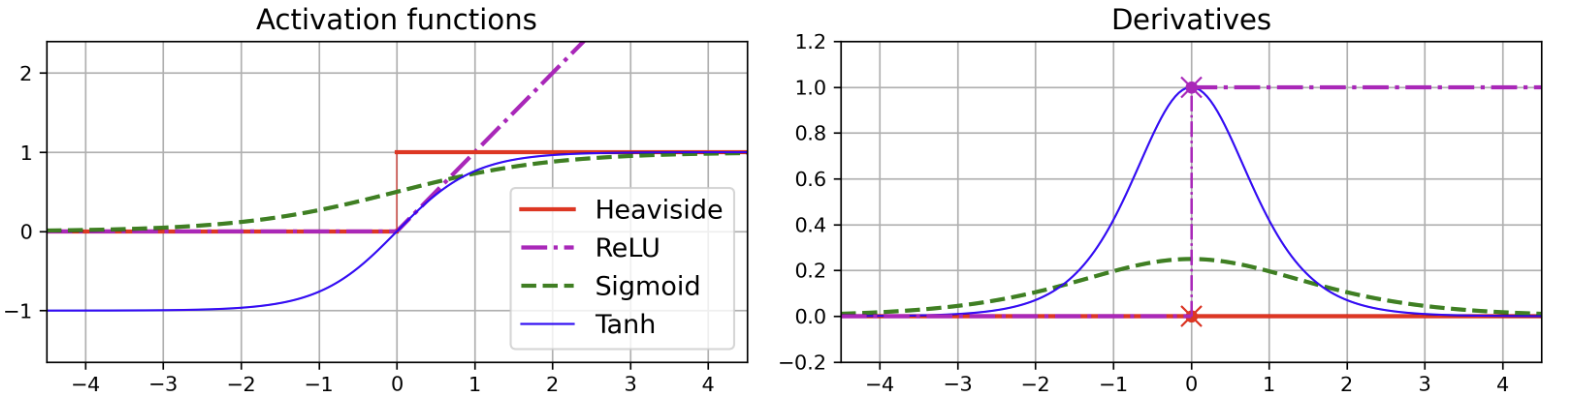

In [12]:
Image("Figs/activation_functions_plot.png",width=800)

- Why do we need activation functions in the first place? If you chain several linear transformations, all you get is a linear transformation.

- Activation function allow for nonlinearity in our model, for example classifying data that is not linearly seperable, and fitting functions that are nonlinear.

- The **universal approximation theorem** essentially says that any continuous function $f:\mathbf{R}^n\rightarrow \mathbf{R}^m$ can be approximated to any precision using neural networks with nonlinear activation functions.

- Neural networks are great function approximators.

- Which activation function should you use for each neuron?

- Input layers don't use activations (they are simply passthrough neurons).

- In general, ReLU activation functions for the hidden layers make training faster (more on this later).

- The activation function for the output layer, however, depends on the task at hand.

- For regression problems, the output layer should have no activation function (or equivalently the identity function), so that the output can take any real number.

- Alternatively, the activation function can be used to restrict the range of the output. For example, if price is being predicted, a ReLU activation function in the final layer ensures the output is nonnegative.

- If the problem is binary classification use the logistic function as activation function for the output layer. If you have a multi-label (binary) classification, you can also use the logistic function. In this case, you will have many neurons in the output layer.

- If you have a multi-class classification, use as many output neurons as the number of classes and a **shared** softmax function (introduced in softmax regression) as the activation function for all the output neurons. The following plot shows this architecture.

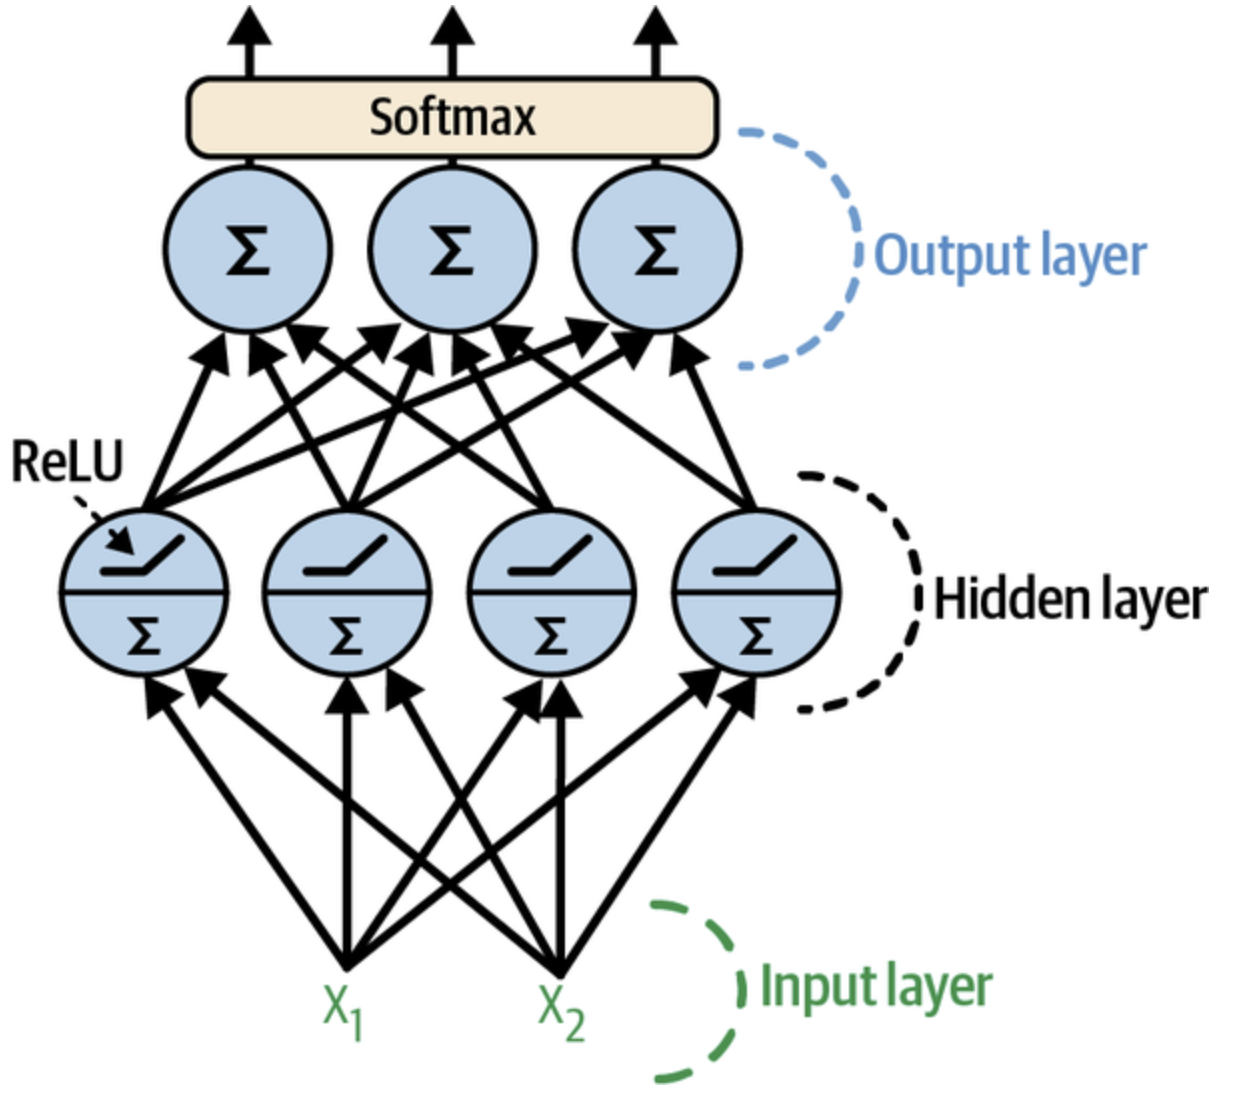

In [13]:
Image("Figs/MLP-softmax.png", width=600)

# 3.2 Typical MLP architectures

- A typical regression MLP may look like this.

| Hyperparameter | Typical value |
| --- | --- | 
| # hidden layers | Depends on the problem, but typically 1 to 5 | 
| # neurons per hidden layers | Depends on the problem, but typically 10 to 100 |
| # output neurons | 1 per prediction dimension |
| Hidden activation | ReLU |
| Output activation | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) |
| Loss function | MSE, or Huber if outliers |

- A softplus fuction is a smooth version of ReLU given by
$$\text{softplus}(t) = \log(e^t+1)$$

- A Huber loss function a robust version of MSE which provide far less penalty to large values, which reduces the effect of outliters. It is given by $$ \begin{align*}\sum_{i=1}^N \text{Huber}_{\delta}(y_i-\hat{y}_i),\end{align*}$$ where
$$\begin{align*}
\text{Huber}_{\delta}(t) = \begin{cases}
\frac{1}{2}t^2 \quad\quad &\text{for } |t|\leq \delta,\\
\delta\left(|t|-\frac{1}{2}\delta\right), \quad\quad &\text{otherwise}
\end{cases}
\end{align*}$$

- A typical classification MLP may look like this.

<table>
 <tr>
  <td> **Hyperparameter** &nbsp;</td>
  <td> **Binary classification** &nbsp;</td>
  <td> **Multi-label binary classification** &nbsp;</td> 
  <td> **Multiclass classification** &nbsp;</td>
 </tr>
 <tr>
  <td>  # hidden layer &nbsp;</td>
  <td colspan="3"> Typically 1 to 5 layers, depending on the task &nbsp;</td>
 </tr>
 <tr>
  <td> # output neurons &nbsp;</td>
  <td> 1 &nbsp;</td>
  <td> 1 per binary label &nbsp;</td>
  <td> 1 per class &nbsp;</td>
 </tr>
 <tr>
  <td> Output layer activation &nbsp;</td>
  <td> Sigmoid &nbsp;</td>
  <td> Sigmoid &nbsp;</td>
  <td> Softmax &nbsp;</td>
 </tr>
 <tr>
  <td> Loss function &nbsp;</td>
  <td> Cross entropy &nbsp;</td>
  <td> Cross entropy &nbsp;</td>
  <td> Cross entropy &nbsp;</td>
 </tr>
</table>

- Recall that cross entropy function is the cost function for softmax regression.

## 3.3 Implementing MLPs with Keras

- Let us train an MLP on the MNIST data set (which is also in Tensorflow introduced below)

In [14]:
import tensorflow as tf

In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.

- We can use Scikit-Learn's `sklearn.neural_network.MLPClassifier` to train an MLP classifier.

- You can specify the number of neurons in each hidden layer using `hidden_layer_sizes`. For example, the following code defines an MLP with two hidden layer, the first one has 300 neurons, and the second one has 100.

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(300,100),
                    activation='relu')

- You can train an MLPClassifier as usual.

- The images come in 28-by-28 arrays, which we need to reshape into 784-element vectors to fit the `MLPClassifier`.

In [17]:
X_train_flatten = X_train.reshape(60000, 784)
X_test_flatten = X_test.reshape(10000, 784)

%time mlp.fit(X_train_flatten, y_train)

CPU times: total: 1h 27min 16s
Wall time: 30min 51s


MLPClassifier(hidden_layer_sizes=(300, 100))

In [18]:
from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test_flatten)
accuracy_score(y_test, y_pred)

0.9842

- We got 98.3% accuracy on the test set.

- Next, let us train a similar MLP using TensorFlow.

- TensorFlow is a powerful library specifically for implementing neural network models.

- Keras is TensorFlow’s high-level deep learning API, that means it is a language that allows neural networks to be created with relatively simple high-level code without needing to directly write TensorFlow code.

- Keras allows you to build, train, evaluate, and use neural networks.

- From now on we will exclusively use Keras for implementing neural networks, rather than Scikit-Learn.

- Keras comes bundled with `TensorFlow`. To install TensorFlow, run `pip install tensorflow` in the terminal

In [19]:
print(tf.__version__)

2.16.1


- First, we define the network structure. The MLP is a "sequential" network, since the layers are stacked on top of each other. You can use `tensorflow.keras.Sequential` class to create such network.

- Each layer is fully connected to the previous layer. You can use `tensorflow.keras.layers.Dense` to add such layers to the model. For each layer, you can define the number of neurons as well as the activation function.

In [20]:
tf.random.set_seed(42)

mlp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\yoshi\OneDrive\Desktop\Teaching\CFRM521 Machine Learning Git\CFRM521\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- Next, specify the hyperparameters for training the network. Specifically, you can specify a loss function, an optimization algorithm, and a metric to output during training.

In [21]:
mlp.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- We use the `sparse_categorical_crossentropy` loss because we have sparse labels (the target variable is given as class indexes 0, 1, ..., 9), and the classes are exclusive.

- If instead the target is a vector probabilities (e.g. a one-hot vector [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `categorical_crossentropy` loss instead.

- If we were doing binary classification (target variable is 0 or 1), then we would use the `binary_crossentropy` loss (with sigmoid activation).

- Finally, you can train the model as follows. Recall that an `epoch` is when you go through the training sample once.

In [22]:
%time mlp.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7355 - loss: 1.0022
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9161 - loss: 0.2967
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9328 - loss: 0.2371
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9442 - loss: 0.2000
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9514 - loss: 0.1731
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9566 - loss: 0.1523
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9629 - loss: 0.1357
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9665 - loss: 0.1220
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9700 - loss: 0.1107
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9724 - loss: 0.1010
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9748 - loss: 0.0926
Epoch 12/30
1875/18

In [23]:
test_loss, test_acc = mlp.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9756 - loss: 0.0796
Test accuracy: 0.9793999791145325


- We got slightly below 98% accuracy over the test set, though with much less training time.

- ANNs have many hyperparameters. For MLP, you can choose the number of hidden layers, the number of neurons in the layers, the activation functions for each neurons, the type and parameters of the training algorithms (e.g. the initial weights, the learning rate), etc.

- Finding good values for these parameters can be a very daunting task. In theory, one can try hyperparameter tuning. In practice, however, this is more an art than a pre-specified set of rules.

- For now, let us concentrate on the number of layers and the number of neurons per layer.

- Due to the universal approximation theorem, even a single hidden layer in theory is capable of representing even the most complex functions, given it has enough neurons.

- So, you can start with just one hidden layer with a reasonable number of neurons. Usually, this will give you a good performance.

- In general, by adding a layer we need much fewer neurons to get the same complexity. In short, the lower layers represent basic characteristics of the inputs (e.g. lines and shapes), while higher level layers build on these characteristics to get more complex representations (e.g. faces).

- So you will generally get better performance by increasing the number of layers than increasing the number of neurons per layer by an equivalent amount, resulting in a more efficient model in terms of the number of neurons needed to represent complex relationships.

- Then you can experiment with adding layers and see if this improves the performance of the model. The danger, however, is that you can quickly end up overfitting the training set.

- It’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting.

- There are many other approaches for achieving a good bias/variance tradeoff.

- Additional guidelines for choosing reasonable values for various hyperparameters, such as the learning rate, or choosing optimizers, are given at the end of Chapter 10 of the textbook.

- We discuss some of these topics and other techniques to obtain a good fit in later lectures. We will also discuss the intricacies of training DNNs.